## Multiclass classification model

Binary Classification = one thing or another (dog or cat).

Multiclass Classification = more that one thing or another.

##### Lets prepare the data

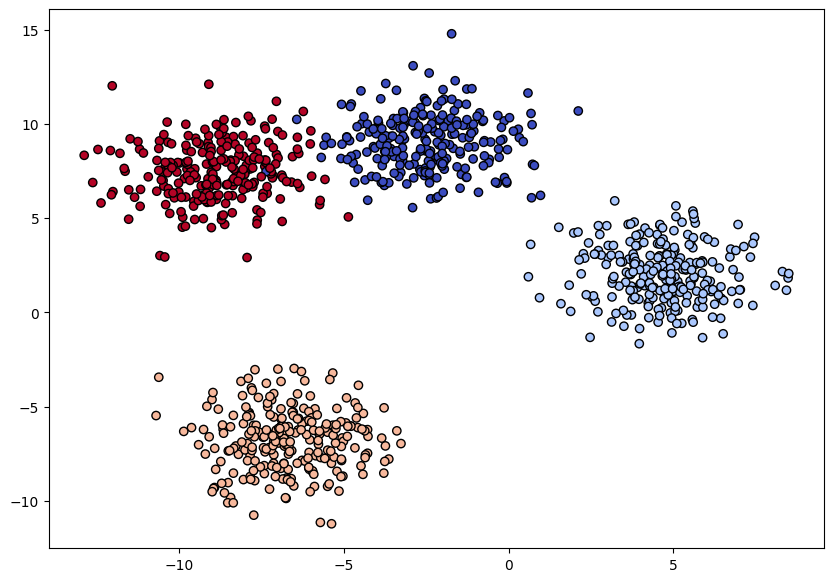

In [47]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

torch.__version__

# Creating a data set

N_SAMPLES = 1000
NUM_FEATURES = 2
NUM_CENTERS = 4

X_blob , y_blob = make_blobs(n_samples=1000,
                             n_features=NUM_FEATURES,
                             centers=NUM_CENTERS,
                             cluster_std=1.5,
                             random_state=42)

# Converting the dataset to tensor

X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.float32)

x_blob_train , x_blob_test = train_test_split(X_blob,
                                              test_size=0.2,
                                              random_state=42)
y_blob_train , y_blob_test = train_test_split(y_blob,
                                              test_size=0.2,
                                              random_state=42)

# Visualizing the data

plt.figure(figsize=(10,7))
plt.scatter(x=X_blob[:,0],
            y=X_blob[:,1],
            c=y_blob,
            cmap="coolwarm",
            edgecolors="k")


In [48]:
import pandas as pd

view_data = pd.DataFrame({"X1":X_blob[:,0],
                          "X2":X_blob[:,1],
                          "label":y_blob})

view_data.head(10)

,X1,X2,label
0,-8.413396,6.935165,3.0
1,-5.766484,-6.431171,2.0
2,-6.042137,-6.766101,2.0
3,3.950837,0.698403,1.0
4,4.250492,-0.281545,1.0
5,-6.794107,-6.477221,2.0
6,5.210176,2.889048,1.0
7,-5.505136,-6.360377,2.0
8,-6.543756,-4.833899,2.0
9,6.449642,0.747766,1.0


#### Lets Build the Multiclass Classification Model

In [49]:
from torch import nn

class Multiclass_classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=8)
        self.layer_2 = nn.Linear(in_features=8,out_features=16)
        self.layer_3 = nn.Linear(in_features=16,out_features=8)
        self.layer_4 = nn.Linear(in_features=8,out_features=4)
        self.relu = nn.ReLU()
    
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))
        # return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))

In [50]:
torch.cuda.manual_seed(42)

multiclass_model = Multiclass_classifier()
multiclass_model

Multiclass_classifier(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=8, bias=True)
  (layer_4): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
)

In [51]:
multiclass_model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3722, -0.6339],
                      [-0.2090, -0.4133],
                      [-0.7003,  0.3175],
                      [ 0.1174, -0.1226],
                      [ 0.1325, -0.3628],
                      [-0.4967, -0.0074],
                      [ 0.5778, -0.4627],
                      [ 0.0663,  0.2978]])),
             ('layer_1.bias',
              tensor([-0.5080, -0.5407,  0.0608, -0.3633, -0.2989, -0.4191, -0.5192,  0.6894])),
             ('layer_2.weight',
              tensor([[-2.1307e-01,  1.4210e-01,  2.8522e-01,  3.2577e-01,  1.6053e-01,
                        1.5717e-01,  6.2485e-03,  3.6840e-02],
                      [ 5.1218e-02,  3.4177e-01, -1.1724e-01, -3.1487e-01, -1.9867e-01,
                        1.0158e-01,  5.0541e-02, -9.6506e-03],
                      [-2.7615e-01,  7.3523e-02,  5.7832e-03,  3.3159e-01, -6.1186e-02,
                       -2.7536e-01, -6.6871e-03, -2.3305e-01],
                 

### Set up loss and optimizer

In [52]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(multiclass_model.parameters(),lr = 0.01)

In [53]:
torch.cuda.manual_seed(42)

with torch.inference_mode():
    y_pred_logits_vect = multiclass_model(x_blob_test)
    y_pred_softmax = torch.softmax(y_pred_logits_vect,dim=1)
    y_pred_argmax = torch.argmax(y_pred_softmax,dim=1)

y_pred_argmax , torch.unique(y_blob_train)

(tensor([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
         0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 1, 0, 1]),
 tensor([0., 1., 2., 3.]))

##### Accuracy function

In [54]:
def accuracy_fn(y_true,y_pred):
    y_true = y_true.long()
    y_pred = y_pred.long()
    correct = torch.eq(y_true,y_pred).sum().item()
    total = len(y_pred)
    acc = (correct/total)*100
    return acc


#### Training and testing of model

In [55]:
epochs = 1000

for epoch in range(epochs):

    multiclass_model.train()
    y_logit_vect = multiclass_model(x_blob_train)
    y_softmax = torch.softmax(y_logit_vect,dim=1)

    y_softmax_argmax = torch.argmax(y_softmax,dim=1)


    loss = loss_fn(y_logit_vect,y_blob_train.long())

    acc = accuracy_fn(y_softmax_argmax , y_blob_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    multiclass_model.eval()

    y_logit_vect_test = multiclass_model(x_blob_test)
    y_softmax_test = torch.softmax(y_logit_vect_test,dim=1)
    y_softmax__test_argmax = torch.argmax(y_softmax_test,dim=1)


    test_loss = loss_fn(y_logit_vect_test,y_blob_test.long())

    test_accuracy = accuracy_fn(y_softmax__test_argmax,y_blob_test)

    if epoch%100 == 0:
        print(f"epoch:{epoch} | loss:{loss} | acc:{acc}| test_loss:{test_loss} | test accuracy:{test_accuracy}")

multiclass_model.state_dict()
    


epoch:0 | loss:1.4372384548187256 | acc:44.125| test_loss:1.4640690088272095 | test accuracy:42.0
epoch:100 | loss:1.0884608030319214 | acc:52.87500000000001| test_loss:1.0691474676132202 | test accuracy:50.5
epoch:200 | loss:0.8560357093811035 | acc:76.25| test_loss:0.8423887491226196 | test accuracy:80.0
epoch:300 | loss:0.4712148904800415 | acc:98.875| test_loss:0.45922917127609253 | test accuracy:99.5
epoch:400 | loss:0.20709049701690674 | acc:99.5| test_loss:0.19883951544761658 | test accuracy:100.0
epoch:500 | loss:0.10454565286636353 | acc:99.5| test_loss:0.09691643714904785 | test accuracy:100.0
epoch:600 | loss:0.06606917828321457 | acc:99.5| test_loss:0.058188579976558685 | test accuracy:100.0
epoch:700 | loss:0.049211252480745316 | acc:99.5| test_loss:0.041034139692783356 | test accuracy:99.5
epoch:800 | loss:0.04047076776623726 | acc:99.5| test_loss:0.03202255070209503 | test accuracy:99.5
epoch:900 | loss:0.035349778831005096 | acc:99.5| test_loss:0.026659047231078148 | te

OrderedDict([('layer_1.weight',
              tensor([[ 0.6270, -0.5278],
                      [-0.4120, -0.5942],
                      [-0.9449,  0.8199],
                      [ 0.0687, -0.1716],
                      [ 0.2290, -0.3370],
                      [-1.0474, -0.3055],
                      [ 0.7512, -0.3728],
                      [ 0.4583,  0.4225]])),
             ('layer_1.bias',
              tensor([-0.4661, -0.5105,  0.0964, -0.3611, -0.2865, -0.3964, -0.4802,  0.7551])),
             ('layer_2.weight',
              tensor([[-0.2165,  0.1040,  0.6358,  0.3284,  0.1634,  0.2926, -0.0290, -0.0364],
                      [ 0.1156,  0.4722, -0.1527, -0.3100, -0.1758,  0.2327,  0.1666,  0.1508],
                      [-0.2761,  0.0735,  0.0058,  0.3316, -0.0612, -0.2754, -0.0067, -0.2331],
                      [ 0.1547,  0.4190,  0.1641, -0.0673, -0.1369,  0.6554, -0.2488, -0.5202],
                      [-0.1587,  0.2101,  0.1519,  0.3066, -0.0809,  0.4987,  0.1784, 

#### Visualizing the data

In [56]:
from helper_functions import plot_decision_boundary

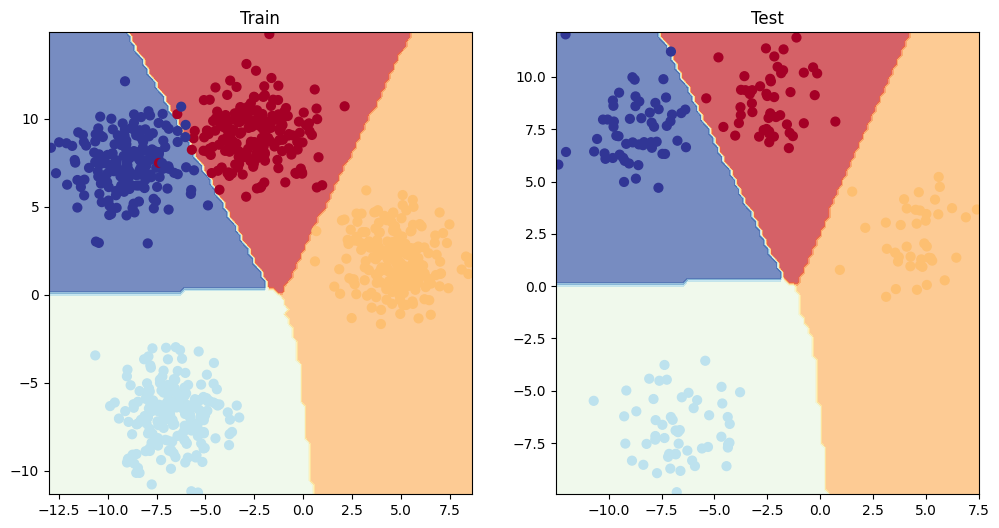

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=multiclass_model,X=x_blob_train,y=y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(multiclass_model,x_blob_test,y_blob_test)